In [78]:
import numpy as np
from scipy.optimize import minimize, curve_fit

In [2]:
def objective_func(x,A):
    return np.sum(A*np.exp(1.0*x)) + np.sum(0.0001*np.exp(5*x)) + np.sum(x**2)

In [33]:
x0 = np.array([0.5,0.5])

cons = ()
# for i in range(2):
cons += ({'type': 'ineq',
          'fun': lambda x: np.array(1-x)},
         {'type': 'ineq',
          'fun': lambda x: np.array(x)})

# cons = ({'type': 'ineq',
#          'fun': lambda x: np.array(1-x[0])},
#         {'type': 'ineq',
#          'fun': lambda x: np.array(x[0]-0.5)},
#         {'type': 'ineq',
#          'fun': lambda x: np.array(1-x[1])},
#         {'type': 'ineq',
#          'fun': lambda x: np.array(x[1]-0.5)})
cons

({'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'})

In [34]:
res = minimize(objective_func, x0, args=(1.0,), constraints=cons, method='SLSQP', options={'disp': True})
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.0002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


     fun: 2.0001999999999933
     jac: array([ 1.00049999,  1.00049999])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ -4.44089210e-15,  -2.22044605e-15])

In [36]:
action = res.x
action

array([ -4.44089210e-15,  -2.22044605e-15])

In [37]:
action[np.where(action < 0)] = 0
action

array([ 0.,  0.])

In [39]:
qual = np.array([0,0.7,1])
0.05121*2.71812**(1.896*qual) + (4.352*10**(-11))*2.71828**(23.45*qual)

array([ 0.05121   ,  0.19365621,  1.00608042])

In [62]:
from __future__ import division
import seaborn as sns 
import matplotlib.pyplot as plt
from data_reader import *

sns.set(color_codes=True)
%matplotlib inline

In [71]:
path = 'data/matlab/compression_ratio_quality.csv'
comp_ratio_quality = read_data(path)
comp_ratio_quality[:,1] = comp_ratio_quality[:,1]/100
comp_ratio_quality.shape

(10100, 2)

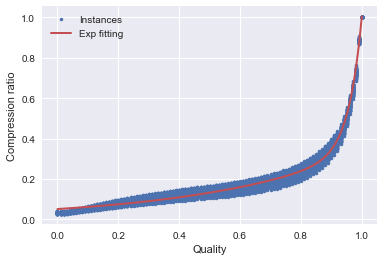

In [77]:
plt.plot(comp_ratio_quality[:,1],comp_ratio_quality[:,0],'.') # quality is x axis
x = np.linspace(0,1,1000)
y_exp = 0.05121*np.exp(1.896*x) + (4.352*10**(-11))*np.exp(23.45*x)
plt.plot(x,y_exp,'r',linewidth=2.0)
# y_poly2 = 0.9096*x**2 -0.4593*x + 0.1094     
# plt.plot(x,y_poly2,'g',linewidth=2.0)

plt.legend(['Instances','Exp fitting'])#,'Poly2 fitting'])
plt.xlabel('Quality')
plt.ylabel('Compression ratio')
plt.savefig('comp_qual_fit.png', dpi=200)

In [106]:
def piecewise_nonlinear(x,x0,a,b,c):
    y = np.piecewise(x, 
                     [x < x0, x >= x0], 
#                      [lambda x:(np.exp(-b-c)*np.exp(b*x0+c)/x0)*x, lambda x:np.exp(-b-c)*np.exp(b*x+c)])
                     [lambda x:((a*np.exp(b*x0+c)+1-a*np.exp(b+c))/x0)*x, lambda x:a*np.exp(b*x+c) + 1-a*np.exp(b+c)])
    return y

def tangent(x,w):
    return 1/np.tan(w) * np.tan(w*x)

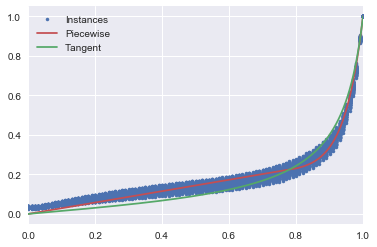

In [107]:
popt_piecewise, pcov = curve_fit(piecewise_nonlinear,
                                 comp_ratio_quality[:,1],
                                 comp_ratio_quality[:,0], 
                                 p0=[0.5, 0.5, 0.5, 0.5],
                                 maxfev=10000)
popt_tan, pcov_tan = curve_fit(tangent,
                               comp_ratio_quality[:,1],
                               comp_ratio_quality[:,0], 
                               p0=[0.5],
                               maxfev=10000)
x = np.linspace(0,1,1000)
plt.plot(comp_ratio_quality[:,1],comp_ratio_quality[:,0],'.') # quality is x axis
plt.plot(x, piecewise_nonlinear(x,*popt_piecewise),'r')
plt.plot(x, tangent(x,popt_tan),'g')
plt.xlim([0,1])
plt.legend(['Instances','Piecewise','Tangent'])
plt.savefig('quality_ratio_curve.png',dpi=200)

In [108]:
popt_piecewise

array([  7.85704331e-01,   4.25687581e-05,   1.82792608e+01,
        -8.45062557e+00])

In [ ]:
Number of total recorded frames: 12911
NUmber of total recorded events:47
Total memory cost: [ 1668.9556793] MB   /   [ 1.62983953] GB
Event length list:  [484, 17, 1401, 554, 65, 606, 69, 69, 114, 69, 70, 2, 70, 327, 552, 72, 501, 501, 2, 499, 69, 65, 250, 4, 247, 74, 501, 76, 77, 2, 63, 3, 2, 73, 64, 501, 88, 951, 951, 712, 48, 45, 8, 74, 514, 501, 951]
The anomaly/memory ratio is: [ 0.13421567] frame/MB
The event/memory ratio is: [ 0.02816132] event/MB
The min event length is: 2
The max event length is: 1401
The mean event length is: 275.70212766
[[ 0.13421567]]
[[ 0.02816132]]
[[ 2.]]
[[ 1401.]]
[[ 275.70212766]]
[[ 47.]]
[[ 12911.]]



Number of total recorded frames: 15539
NUmber of total recorded events:25
Total memory cost: [ 1443.16245683] MB   /   [ 1.40933834] GB
Event length list:  [2353, 501, 62, 501, 501, 113, 518, 64, 501, 2751, 501, 66, 71, 501, 74, 75, 61, 532, 501, 84, 501, 3201, 79, 501, 951]
The anomaly/memory ratio is: [ 0.15521468] frame/MB
The event/memory ratio is: [ 0.01732307] event/MB
The min event length is: 61
The max event length is: 3201
The mean event length is: 622.56
[[ 0.15521468]]
[[ 0.01732307]]
[[ 61.]]
[[ 3201.]]
[[ 622.56]]
[[ 25.]]
[[ 15539.]]